In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("D:/iNeuron/dataBase/EDA_Dataset/data5/Visadataset.csv")

In [3]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Null value check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [5]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


### Duplicated values check

In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25475    False
25476    False
25477    False
25478    False
25479    False
Length: 25480, dtype: bool

In [7]:
df.duplicated().sum()

0

### Unique Value Check

In [8]:
df.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

### Data coorelation

In [9]:
df.corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [10]:
'''There is no visible coorelation.'''

'There is no visible coorelation.'

### Skewness

In [11]:
df.skew()

C:\Users\abhis\AppData\Local\Temp\ipykernel_1280\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


no_of_employees    12.265260
yr_of_estab        -2.037301
prevailing_wage     0.755776
dtype: float64

In [12]:
'''The prevailing wages seems skewed. It may be because of the unit of wages. Lets drill down into it.'''

'The prevailing wages seems skewed. It may be because of the unit of wages. Lets drill down into it.'

In [13]:
#unit of wages seem to be different so lets have a look into it
df['unit_of_wage'].value_counts()

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

In [14]:
df[df['unit_of_wage']== 'Month']

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
220,EZYV221,Asia,Bachelor's,Y,N,879,1996,Midwest,141796.39,Month,Y,Certified
241,EZYV242,Oceania,Doctorate,Y,N,2871,2009,South,56606.54,Month,Y,Certified
438,EZYV439,Asia,High School,Y,N,4562,2006,Northeast,88925.59,Month,Y,Denied
498,EZYV499,Asia,Bachelor's,N,N,1110,1963,South,97931.99,Month,Y,Certified
540,EZYV541,Africa,Master's,Y,N,4506,1949,West,82793.80,Month,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
24615,EZYV24616,Asia,Master's,Y,N,3885,1961,South,78587.67,Month,Y,Certified
24668,EZYV24669,Asia,Bachelor's,Y,N,2247,2005,West,81826.01,Month,Y,Certified
24886,EZYV24887,North America,High School,Y,N,2115,1989,Northeast,1599.28,Month,Y,Certified
25106,EZYV25107,North America,Master's,Y,N,902,1955,Northeast,94376.07,Month,Y,Certified


In [15]:
df[df['unit_of_wage']== 'Week'].describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,272.000000,272.000000,272.000000
mean,6582.580882,1971.323529,85606.820515
std,26231.867394,45.234181,44802.704810
min,64.000000,1807.000000,2183.230000
25%,1019.000000,1959.750000,51408.277500
50%,1950.000000,1991.500000,85075.820000
75%,3338.250000,2002.000000,111331.910000
max,278152.000000,2016.000000,280175.950000


In [16]:
df[df['unit_of_wage']== 'Month'].describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,89.000000,89.000000,89.000000
mean,2759.595506,1973.516854,87592.864045
std,4529.557952,48.427808,59525.124924
min,46.000000,1819.000000,1599.280000
25%,879.000000,1967.000000,44986.240000
50%,2101.000000,1995.000000,81826.010000
75%,3014.000000,2004.000000,121629.600000
max,36511.000000,2013.000000,264362.950000


In [17]:
df[df['unit_of_wage']== 'Year'].describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,22962.000000,22962.000000,22962.000000
mean,5803.232602,1980.042026,81228.077133
std,23487.032542,41.913560,49951.473223
min,-26.000000,1800.000000,100.000000
25%,1037.000000,1977.000000,43715.955000
50%,2146.000000,1997.000000,76174.500000
75%,3566.500000,2005.000000,111341.960000
max,602069.000000,2016.000000,319210.270000


In [18]:
df[df['unit_of_wage']== 'Hour'].describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,2157.000000,2157.000000,2157.000000
mean,4221.774687,1973.943904,414.570513
std,14847.427144,45.896877,275.015000
min,-26.000000,1807.000000,2.136700
25%,877.000000,1968.000000,152.700300
50%,1836.000000,1993.000000,372.652300
75%,2974.000000,2003.000000,637.311100
max,288512.000000,2016.000000,999.919500


In [19]:
'''It seems that the mean of prevailing_wages are similar in case of:
unit of wage == year, month & week
only in case of 
unit of wage == hour it is low'''
82000/414


198.06763285024155

In [20]:
# lets create a new feature called adjusted_wage
# it will have same value as prevailing wage in case of week, month, year and a value of 200*prevailling wage for hour

df['adjust_wage'] = 0
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,adjust_wage
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0


In [21]:
df['adjust_wage'][df['unit_of_wage']=='Hour'] = df['prevailing_wage']*200
df['adjust_wage'][df['unit_of_wage']!='Hour'] = df['prevailing_wage']

C:\Users\abhis\AppData\Local\Temp\ipykernel_1280\2725398995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adjust_wage'][df['unit_of_wage']=='Hour'] = df['prevailing_wage']*200
C:\Users\abhis\AppData\Local\Temp\ipykernel_1280\2725398995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adjust_wage'][df['unit_of_wage']!='Hour'] = df['prevailing_wage']


In [22]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage,adjust_wage
count,25480.000000,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592,81439.782045
std,22877.928848,42.366929,52815.942327,50385.433915
min,-26.000000,1800.000000,2.136700,100.000000
25%,1022.000000,1976.000000,34015.480000,43017.867500
50%,2109.000000,1997.000000,70308.210000,76215.735000
75%,3504.000000,2005.000000,107735.512500,112215.930000
max,602069.000000,2016.000000,319210.270000,319210.270000


In [22]:
'''In the above the data of adjust_wage seems more balanced as compared to that of prevailing_wage.'''

'In the above the data of adjust_wage seems more balanced as compared to that of prevailing_wage.'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='adjust_wage'>

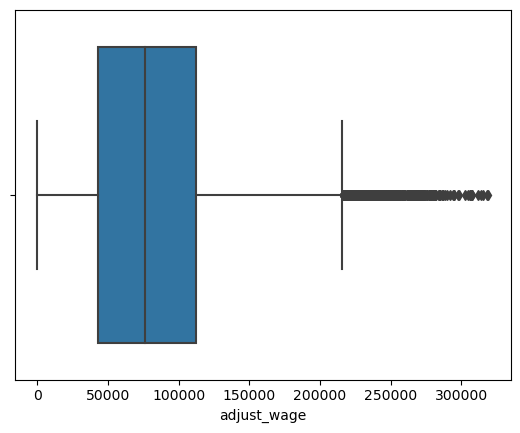

In [23]:
# for adjusted wage
sns.boxplot(df['adjust_wage'])

### Visualizing the plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prevailing_wage', ylabel='Density'>

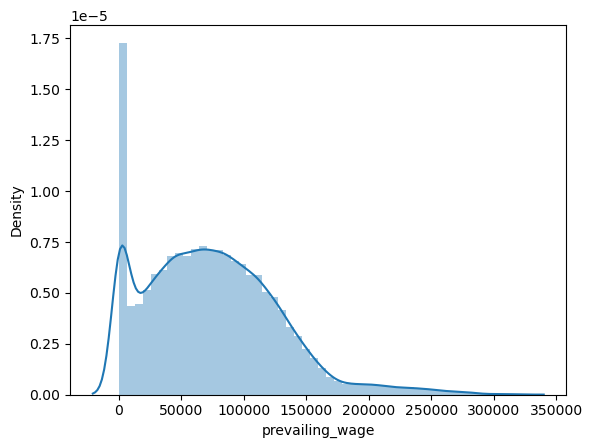

In [24]:
sns.distplot(df['prevailing_wage'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='adjust_wage', ylabel='Density'>

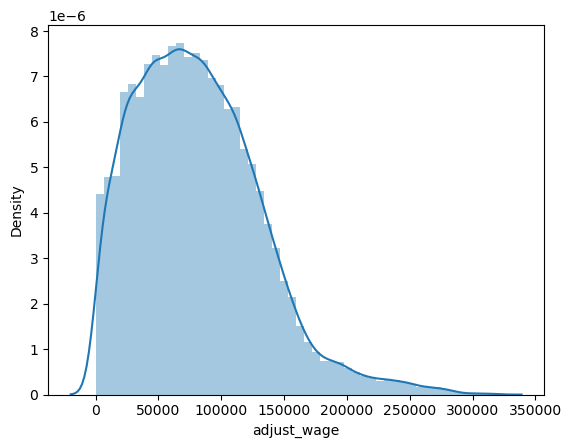

In [25]:
# for the adjusted wages
sns.distplot(df['adjust_wage'])

##### Using the adjusted wages has clearly removed the abnormal spike caused due to the abnormality in the hour wages.

In [26]:
## Other EDA using groupby
df.groupby('unit_of_wage').mean()

,no_of_employees,yr_of_estab,prevailing_wage,adjust_wage
unit_of_wage,,,,
Hour,4221.774687,1973.943904,414.570513,82914.102596
Month,2759.595506,1973.516854,87592.864045,87592.864045
Week,6582.580882,1971.323529,85606.820515,85606.820515
Year,5803.232602,1980.042026,81228.077133,81228.077133


In [27]:
df.groupby('yr_of_estab').mean()

,no_of_employees,prevailing_wage,adjust_wage
yr_of_estab,,,
1800,3617.937500,99893.115625,99893.115625
1801,1657.333333,87598.964167,87598.964167
1804,14092.222222,78381.123333,78381.123333
1807,1798.833333,49925.747983,70969.596667
1809,1817.444444,69546.088889,69546.088889
...,...,...,...
2012,5344.939024,73867.523067,79881.856707
2013,4880.183865,69502.868027,75180.699550
2014,5359.874286,71729.490707,77914.994857


### Checking Normality

In [50]:
from scipy.stats import normaltest

In [51]:
normaltest(df['prevailing_wage'])

NormaltestResult(statistic=2315.646633847051, pvalue=0.0)

In [52]:
normaltest(df['adjust_wage'])

NormaltestResult(statistic=2641.883560966987, pvalue=0.0)

<AxesSubplot:xlabel='prevailing_wage', ylabel='Count'>

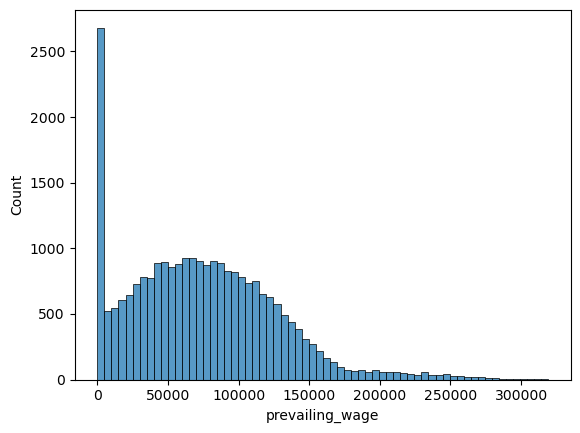

In [53]:
sns.histplot(df['prevailing_wage'])

<AxesSubplot:xlabel='adjust_wage', ylabel='Count'>

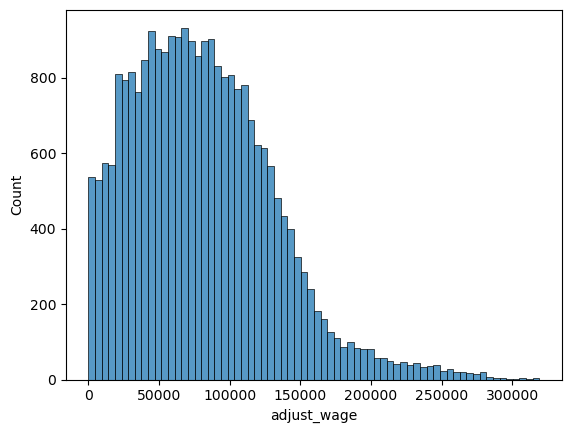

In [54]:
sns.histplot(df['adjust_wage'])

### Outlier cleaning

<AxesSubplot:>

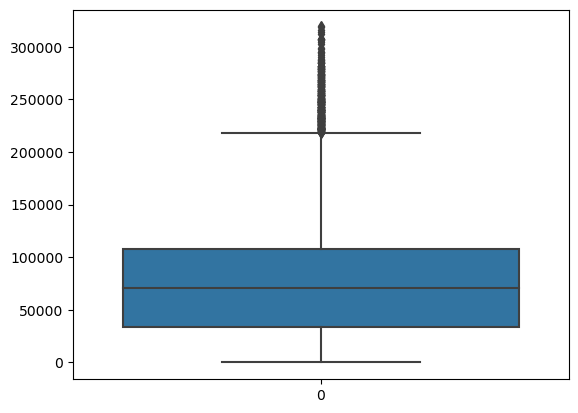

In [55]:
# Outlier cleaning in case of prevailing wage
sns.boxplot(data = df['prevailing_wage'])

<AxesSubplot:>

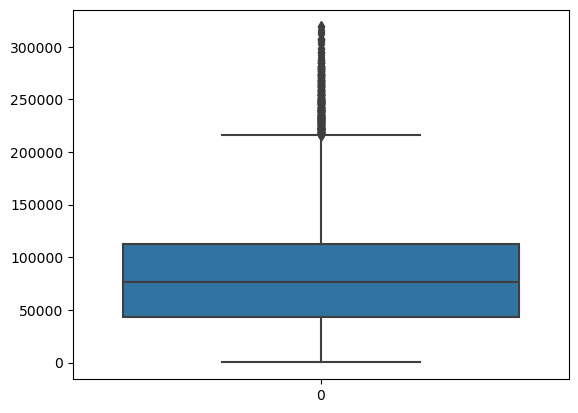

In [56]:
sns.boxplot(data = df['adjust_wage'])

<AxesSubplot:>

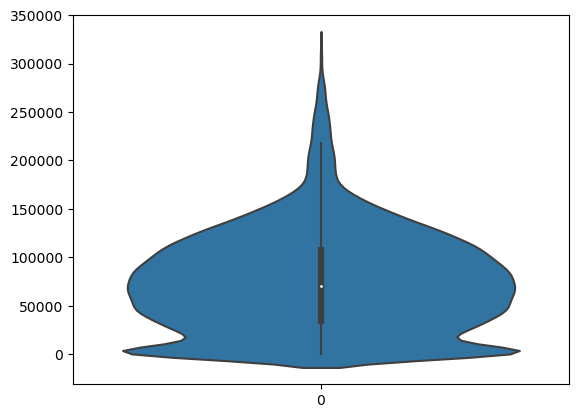

In [61]:
sns.violinplot(data = df['prevailing_wage'])

In [57]:
q1 = df['prevailing_wage'].quantile(0.25)
q3 = df['prevailing_wage'].quantile(0.75)
IQR = q3 - q1

uplim = q3 + (1.5*IQR)
lowlim = q1 - (1.5*IQR)

In [59]:
print(uplim, lowlim)

218315.56125000003 -76564.56875000002


In [58]:
df['prevailing_wage'][df['prevailing_wage'] < lowlim]

Series([], Name: prevailing_wage, dtype: float64)

In [60]:
df['prevailing_wage'][df['prevailing_wage'] > uplim]

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [62]:
## Here we can replace the outliers by their upperlimit. 
# No need to touch lower limit as their are no outliers in the lower limit

df['prevailing_wage'][df['prevailing_wage'] > uplim] = uplim

C:\Users\abhis\AppData\Local\Temp\ipykernel_1280\3261886504.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prevailing_wage'][df['prevailing_wage'] > uplim] = uplim


<AxesSubplot:>

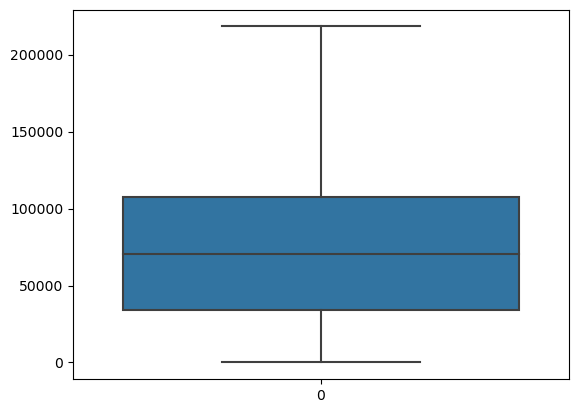

In [63]:
# now
sns.boxplot(data = df['prevailing_wage'])

<AxesSubplot:>

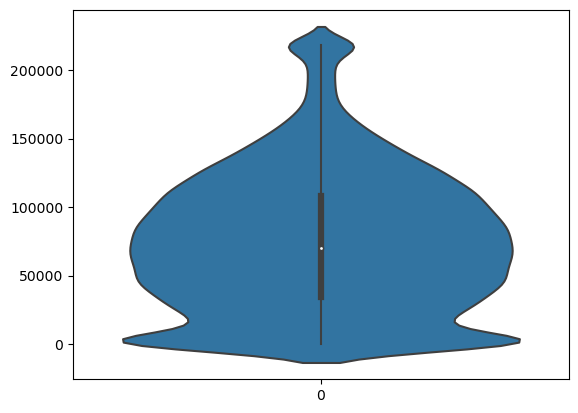

In [64]:
sns.violinplot(data = df['prevailing_wage'])

<AxesSubplot:>

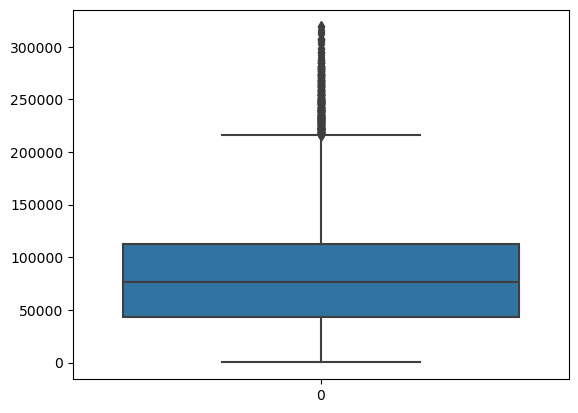

In [65]:
## Similarly for the adjusted wages
sns.boxplot(data = df['adjust_wage'])

<AxesSubplot:>

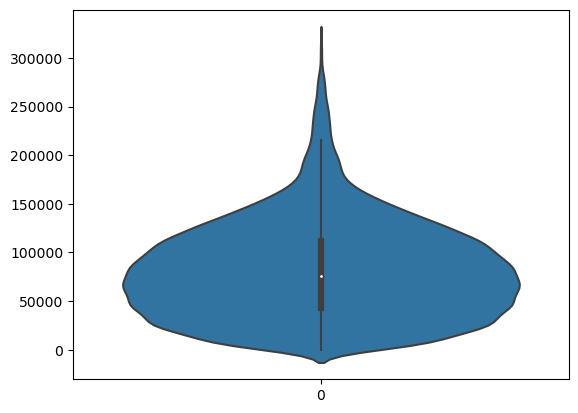

In [66]:
sns.violinplot(data = df['adjust_wage'])

In [67]:
qq1 = df['adjust_wage'].quantile(0.25)
qq3 = df['adjust_wage'].quantile(0.75)
IQR = qq3 - qq1

upl = qq3 + (1.5*IQR)
lowl = qq1 - (1.5*IQR)

In [69]:
print(upl, lowl)

216013.02375 -60779.22625


In [70]:
# here also low limit is not effective

df['adjust_wage'][df['adjust_wage'] > upl] = upl

C:\Users\abhis\AppData\Local\Temp\ipykernel_1280\1315056823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adjust_wage'][df['adjust_wage'] > upl] = upl


<AxesSubplot:>

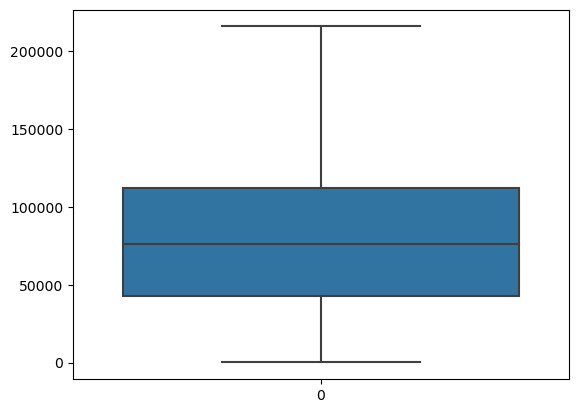

In [71]:
sns.boxplot(data = df['adjust_wage'])

<AxesSubplot:>

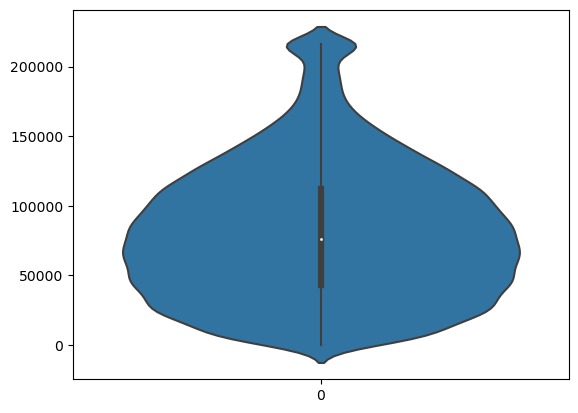

In [72]:
sns.violinplot(data = df['adjust_wage'])

<AxesSubplot:>

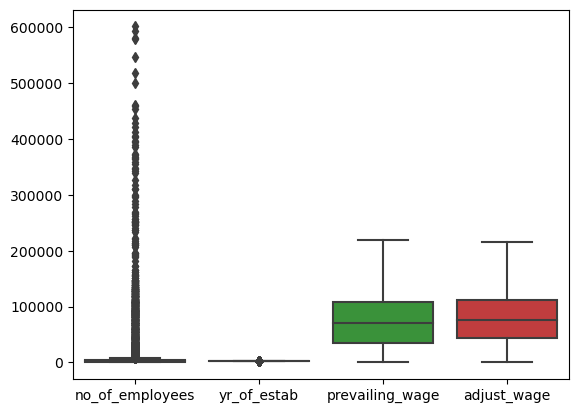

In [74]:
## Similarly
sns.boxplot(data = df)

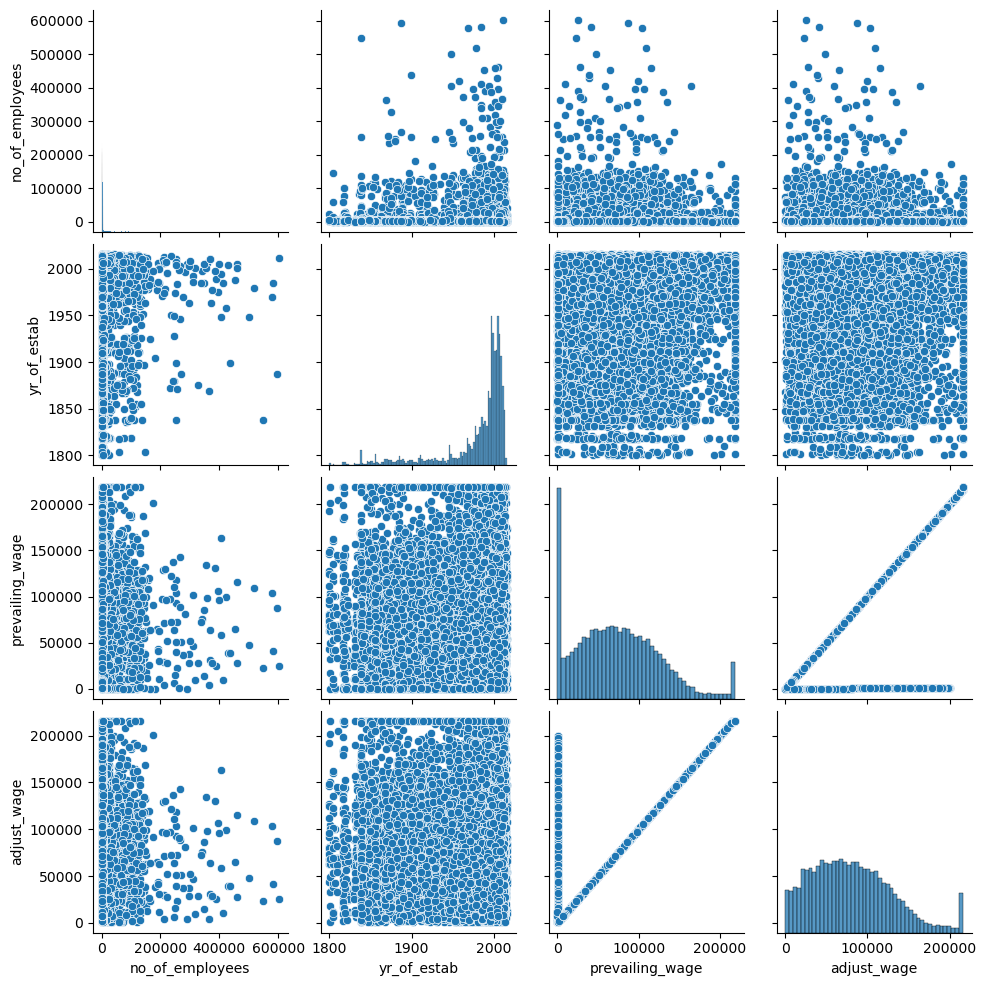

In [75]:
sns.pairplot(data = df)